In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2022-12-07 18:39:05.566736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.disable_eager_execution()

In [3]:
tf.executing_eagerly()

False

In [4]:
df=pd.read_csv('/Users/taliyas/Downloads/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.shape

(4981, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
# Check missing value
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
#Encoding
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural':0})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


In [21]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print('x shape: ',x.shape,'\ny shape: ' , y.shape)

x shape:  (4981, 10) 
y shape:  (4981,)


In [22]:
from collections import Counter
#count number of ones and zeros
Counter(y)

Counter({1: 248, 0: 4733})

In [23]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [25]:
Counter(y_data)

Counter({1: 4733, 0: 4733})

In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_data=scale.fit_transform(x_data)
x_data

array([[-1.23848393,  0.5284711 , -0.51736115, ...,  2.00922441,
         1.24406063, -1.4113483 ],
       [-1.23848393,  1.11551002, -0.51736115, ..., -0.22728192,
         0.55639701, -0.42504267],
       [ 0.95034875, -0.28435202, -0.51736115, ...,  0.96247314,
         0.87507039,  0.56126296],
       ...,
       [-0.56631907,  0.04916843,  0.38406921, ...,  1.76035502,
         1.09377214,  1.2446857 ],
       [-0.16185699,  0.61878478, -0.51736115, ..., -0.44269323,
        -0.58473452,  0.57729506],
       [-1.23848393,  0.1168027 , -0.51736115, ..., -0.59888995,
         0.76437045,  0.24033805]])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=100,shuffle=1)

In [44]:
y_train=y_train.reshape((y_train.shape[0],1))
y_test= y_test.reshape((y_test.shape[0],1))

In [45]:
print(y_train.shape, y_test.shape)

(6626, 1) (2840, 1)


In [46]:
features = x_train.shape[1]
eps = 1e-12
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
print(features)

10


In [47]:
pred = tf.nn.sigmoid(tf.matmul(x,W) + b)
loss1 = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=pred)
loss= tf.reduce_mean(loss1)

In [48]:
update = tf.train.GradientDescentOptimizer(0.000001).minimize(loss)

In [49]:
def logistic_fun(z):
    return 1/(1.0 + np.exp(-z))

In [50]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,10000):
	sess.run(update, feed_dict = {x:x_train, y_:y_train})

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score

In [65]:
def predict(x_data, y_data):
    y_pred = []
    answer = []
    for j in range(y_data.shape[0]):
        p=logistic_fun(np.matmul(x_data[j],sess.run(W)) + sess.run(b))
        answer.append(p)
        if p > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return np.array(y_pred), np.array(answer)

train accuracy: 0.7494717778448536 
f1_score:  0.7445367805478608 
recall:  0.7305949864089399 
precision:  0.7590210229055538 
confution matrix:  [[2547  768]
 [ 892 2419]]


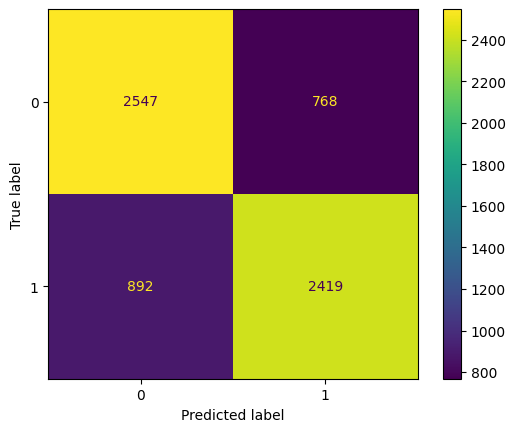

In [68]:
# train result

pred_train, ans = predict(x_train, y_train)
print("train accuracy:",accuracy_score(y_train, pred_train),
      "\nf1_score: ", f1_score(y_train, pred_train),
      "\nrecall: ", recall_score(y_train, pred_train),
      "\nprecision: ", precision_score(y_train, pred_train),
    "\nconfution matrix: ", confusion_matrix(y_train,pred_train))

cm = confusion_matrix(y_train, pred_train)
cm_display = ConfusionMatrixDisplay(cm).plot()

test accuracy: 0.7482394366197183 
f1_score:  0.7472605160834216 
recall:  0.7433192686357243 
precision:  0.7512437810945274 
confution matrix:  [[1068  350]
 [ 365 1057]]


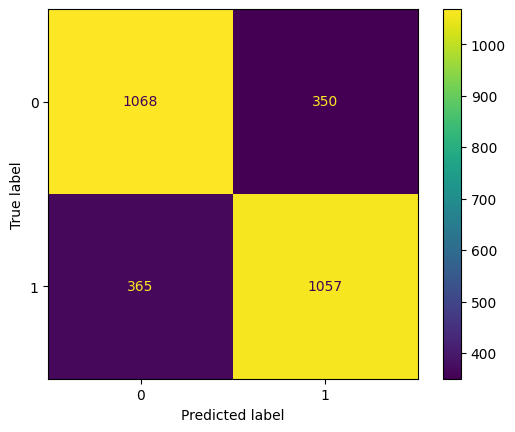

In [69]:
# test results

pred_test, ans = predict(x_test, y_test)
print("test accuracy:",accuracy_score(y_test, pred_test),
      "\nf1_score: ", f1_score(y_test, pred_test),
      "\nrecall: ", recall_score(y_test, pred_test),
      "\nprecision: ", precision_score(y_test, pred_test),
    "\nconfution matrix: ", confusion_matrix(y_test,pred_test))

cm = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [63]:
ans

array([[0.4991726 ],
       [0.50009145],
       [0.49996758],
       ...,
       [0.5002983 ],
       [0.50038146],
       [0.49898926]])